In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
exp = "exp123"
exp_results = pd.read_csv(f'{exp}.csv')
cmds = pd.read_csv(f'{exp}_cmds.csv')
gates = pd.read_csv(f'{exp}_gates.csv')

Text(0, 0.5, 'y')

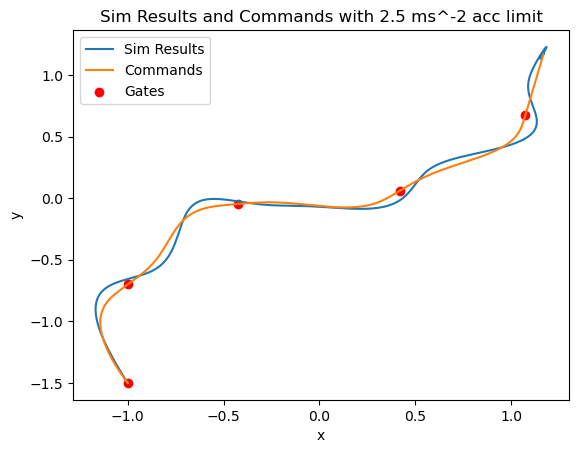

In [47]:
plt.plot(exp_results["x"], exp_results["y"], label="Sim Results")
plt.plot(cmds["x"], cmds["y"], label="Commands")
plt.scatter(gates["gate_x"], gates["gate_y"], label="Gates", color="red")
plt.legend()
plt.title("Sim Results and Commands with 2 ms^-2 acc limit")
plt.xlabel("x")
plt.ylabel("y")